**Target:**

- Adding Batch-norm to increase model efficiency.

**Results:**

- Parameters: 7.86k
- Best Training Accuracy: 99.53
- Best Test Accuracy: 99.24

**Analysis:**

- We have started to see over-fitting now.
- We need some regularisation to counter this overfitting 

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets
from torchsummary import summary
import matplotlib.pyplot as plt
from models import Net5
from utils import train, test

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net5().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
              ReLU-2            [-1, 8, 26, 26]               0
       BatchNorm2d-3            [-1, 8, 26, 26]              16
            Conv2d-4           [-1, 16, 24, 24]           1,152
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7            [-1, 8, 24, 24]             128
         MaxPool2d-8            [-1, 8, 12, 12]               0
            Conv2d-9           [-1, 12, 10, 10]             864
             ReLU-10           [-1, 12, 10, 10]               0
      BatchNorm2d-11           [-1, 12, 10, 10]              24
           Conv2d-12             [-1, 12, 8, 8]           1,296
             ReLU-13             [-1, 12, 8, 8]               0
      BatchNorm2d-14             [-1, 1

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


100%|██████████| 9912422/9912422 [00:00<00:00, 170801061.74it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25416637.39it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 51232620.17it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 12574606.45it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



In [4]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [5]:
model = Net5().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    train_losses, train_acc = train(model, device, train_loader, optimizer, criterion, train_losses, train_acc)
    test_losses, test_acc = test(model, device, test_loader, criterion, test_losses, test_acc)

Epoch 1


Train: Loss=0.0905 Batch_id=468 Accuracy=92.95: 100%|██████████| 469/469 [00:20<00:00, 23.36it/s]


Test set: Average loss: 0.0623, Accuracy: 9853/10000 (98.53%)

Epoch 2


Train: Loss=0.0559 Batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:20<00:00, 23.07it/s]


Test set: Average loss: 0.0550, Accuracy: 9838/10000 (98.38%)

Epoch 3


Train: Loss=0.0251 Batch_id=468 Accuracy=98.73: 100%|██████████| 469/469 [00:19<00:00, 24.10it/s]


Test set: Average loss: 0.0392, Accuracy: 9890/10000 (98.90%)

Epoch 4


Train: Loss=0.0408 Batch_id=468 Accuracy=98.89: 100%|██████████| 469/469 [00:18<00:00, 24.89it/s]


Test set: Average loss: 0.0305, Accuracy: 9908/10000 (99.08%)

Epoch 5


Train: Loss=0.0053 Batch_id=468 Accuracy=99.03: 100%|██████████| 469/469 [00:19<00:00, 24.24it/s]


Test set: Average loss: 0.0369, Accuracy: 9887/10000 (98.87%)

Epoch 6


Train: Loss=0.0186 Batch_id=468 Accuracy=99.15: 100%|██████████| 469/469 [00:19<00:00, 23.90it/s]


Test set: Average loss: 0.0283, Accuracy: 9916/10000 (99.16%)

Epoch 7


Train: Loss=0.0074 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:19<00:00, 23.94it/s]


Test set: Average loss: 0.0286, Accuracy: 9918/10000 (99.18%)

Epoch 8


Train: Loss=0.0489 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:18<00:00, 24.70it/s]


Test set: Average loss: 0.0290, Accuracy: 9916/10000 (99.16%)

Epoch 9


Train: Loss=0.0310 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:19<00:00, 24.42it/s]


Test set: Average loss: 0.0325, Accuracy: 9899/10000 (98.99%)

Epoch 10


Train: Loss=0.0074 Batch_id=468 Accuracy=99.35: 100%|██████████| 469/469 [00:19<00:00, 23.55it/s]


Test set: Average loss: 0.0265, Accuracy: 9922/10000 (99.22%)

Epoch 11


Train: Loss=0.0322 Batch_id=468 Accuracy=99.34: 100%|██████████| 469/469 [00:19<00:00, 23.64it/s]


Test set: Average loss: 0.0274, Accuracy: 9921/10000 (99.21%)

Epoch 12


Train: Loss=0.0067 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:18<00:00, 24.74it/s]


Test set: Average loss: 0.0252, Accuracy: 9923/10000 (99.23%)

Epoch 13


Train: Loss=0.0040 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:19<00:00, 24.62it/s]


Test set: Average loss: 0.0236, Accuracy: 9924/10000 (99.24%)

Epoch 14


Train: Loss=0.0096 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]


Test set: Average loss: 0.0274, Accuracy: 9918/10000 (99.18%)

Epoch 15


Train: Loss=0.0168 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:19<00:00, 23.87it/s]


Test set: Average loss: 0.0254, Accuracy: 9920/10000 (99.20%)



Text(0.5, 1.0, 'Test Accuracy')

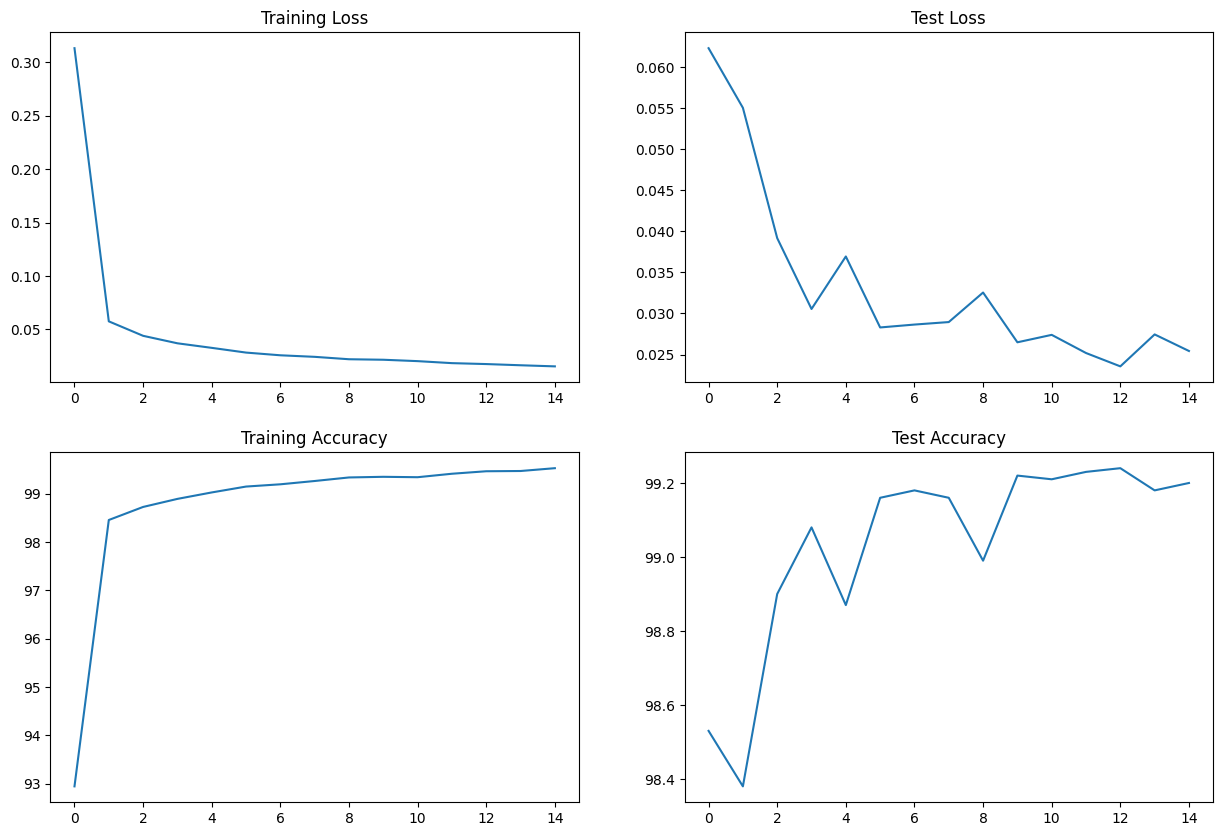

In [6]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [7]:
print("best train accuracy : ", max(train_acc))
print("best test accuracy : ", max(test_acc))

best train accuracy :  99.52833333333334
best test accuracy :  99.24


In [8]:
print("best train loss : ", min(train_losses))
print("best test loss : ", min(test_losses))

best train loss :  0.015518352148686049
best test loss :  0.023555635410547258
